# Factorización de matrices

##### Función graficadora

In [ ]:
import numpy as np # usar torch??
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def initial():

  colors = ["c", "m", "y", "b"]

  X = [[2*i-1,2*j-1] for i in range(2) for j in range(2)]
  aux = X[2][:]
  X[2][:] = X[3][:]
  X[3][:] = aux
  X = np.matrix(X).T # np.matrix(X).transpose()

  plt.figure(figsize=(4, 4))
  ax1 = plt.subplot(111)
  ax1.scatter(X[0,:].flat, X[1,:].flat, color = colors,
              s = 12*16, alpha = 1.0, marker = "s")   
  ax1.scatter((2 * X[0,:]).flat, (2* X[1,:]).flat, color = colors,
              s = 12*16, alpha = 0.0, marker = "s")
  ax1.add_patch(Polygon(xy = X.T, color = "g", alpha = 1))  
  plt.show()

def show_TL(T): 
  T = np.matrix(T)
  if T.shape != np.shape(np.eye(2)):
    print("[INFO] bad matrix! it's not squared")
    return
  X = [[2*i-1,2*j-1] for i in range(2) for j in range(2)]
  aux = X[2][:]
  X[2][:] = X[3][:]
  X[3][:] = aux
  X = np.matrix(X).T # np.matrix(X).transpose()
  TX = T @ X

  w = TX[0,:].max() - TX[0,:].min()
  h = TX[1,:].max() - TX[1,:].min()

  if w < 2:
    w = 2
  if h < 2:
    h = 2
  while w > 5 or w > 5:
    h *= 0.99
    w *= 0.99

  colors = ["c", "m", "y", "b"]
  

  plt.figure(figsize=(3*w*1.2, h*1.2))

  ax1 = plt.subplot(131)
  ax1.set_axis_off()
  ax1.add_patch(Polygon(xy = X.T, color = "g", alpha = 1.0))
  ax1.add_patch(Polygon(xy = TX.T, color = "k", alpha = 0.0))
  ax1.scatter(X[0,:].flat, X[1,:].flat, color = colors,
              s = 12*h*w, alpha = 1.0, marker = "s")  
  ax1.scatter(TX[0,:].flat, TX[1,:].flat, color = colors,
              s = 12*h*w, alpha = 0.0, marker = "s")  

  ax2 = plt.subplot(132)
  ax2.set_axis_off()
  ax2.add_patch(Polygon(xy = X.T, color = "g", alpha = 0.0))
  ax2.add_patch(Polygon(xy = TX.T, color = "k", alpha = 1.0))
  ax2.scatter(X[0,:].flat, X[1,:].flat, color = colors,
              s = 12*h*w, alpha = 0.0, marker = "s")  
  ax2.scatter(TX[0,:].flat, TX[1,:].flat, color = colors,
              s = 12*h*w, alpha = 1.0, marker = "s")  

  ax3 = plt.subplot(133)
  ax3.add_patch(Polygon(xy = X.T, color = "g", alpha = 0.5))
  ax3.add_patch(Polygon(xy = TX.T, color = "k", alpha = 0.5))
  ax3.scatter(X[0,:].flat, X[1,:].flat, color = colors,
              s = 12*h*w, alpha = 0.0, marker = "s")  
  ax3.scatter(TX[0,:].flat, TX[1,:].flat, color = colors,
              s = 12*h*w, alpha = 0.0, marker = "s")  

  plt.show()

## ¿Qué puede hacer una transformación lineal?


Como vimos en clases anteriores, una transforación lineal es un tipo de **función** que toma elementos de un espacio vectorial y nos devuelve elementos de otro espacio vectoral.

Para ser lineal le pedíamos a la transformación que cumpla una serie de condiciones

* debe preservar la multiplicación componente a componente.
  * $T(kx_1) = kT(x_1)$
* debe preservar suma de vectores
  * $T(x_1 + x_2) = T(x_1) + T(x_2)$

Estás dos condiciones son muy restrictivas. Por ejemplo, puede verse que estás condiciones implican:

* $T(0) = 0$
* $T(-x_1) = -T(x_1)$

Se puede demostrar que toda transformación lineal $T$ existe una matriz asociada $M_T$. Esta matriz asociada $M_T$ tiene la siguiente propiedad:

* $T(x_1) = M_T x_1$

Es decir, el cálculo de aplicar la trasnformación lineal $T$ al vector $x_1$, se reduce a calcular el producto matricial entre $M_T$ y el vector columna de $x_1$. Este fue el motivo principal de querer usar transformaciones lineales. 

Esta propiedad de las trasnformaciones lineales nos permite hacer lo que los matemáticos llaman *abuso de notación*. Es decir, a partir de ahora usaremos $T$ para representar, tanto a la transformación lineal, como a su matriz asociada. Esta es una practica usual en Algebra Lineal. Sin embargo, la transformación y la matriz son entidades distintas. Una es una función y la otra es una matriz.

Sabemos que al concentrarnos solo en las transformaciones lineales, perdemos parte de la expresividad que tienen las funciones. En ese sentido es una buena idea saber que ***¿qué pueden hacer las trasformaciones lineales por nosotros?***



## Jugando con matrices

Una buena idea para tratar de entender a las transformaciones lineales es analizar que hace una trasnformación sobre los vertices de un cuadrado. Para esto elegimos los vertices de un cuadrado de lado 2 entrado en el origen.

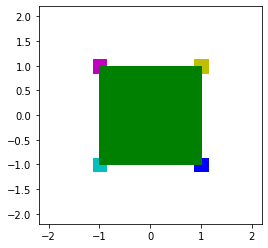

In [ ]:
initial()

### $C
= \begin{bmatrix}
\frac{1}{2} & 0\\
0 & 1\\
\end{bmatrix}$

Tengo la siguiente transformación lineal:

$\begin{bmatrix}
1 \\
0 \\
\end{bmatrix} → \begin{bmatrix}
\frac{1}{2}\\
0\\
\end{bmatrix}$

$\begin{bmatrix}
0\\
1\\
\end{bmatrix} → \begin{bmatrix}
0\\
1\\
\end{bmatrix}$

¿Qué hace esta trasformación lineal?

$ C = \begin{bmatrix}
\frac{1}{2} & 0\\
0 & 1\\
\end{bmatrix}$

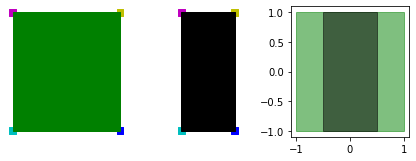

In [ ]:
C = [[0.5,0]
     ,[0,1]]
show_TL(C)

### $E 
= \begin{bmatrix}
1 & 0\\
0 & 3\\
\end{bmatrix}$

Tengo la siguiente transformación lineal:

$\begin{bmatrix}
1\\
0\\
\end{bmatrix} → \begin{bmatrix}
1\\
0\\
\end{bmatrix}$

$\begin{bmatrix}
0\\
1\\
\end{bmatrix} → \begin{bmatrix}
0\\
3\\
\end{bmatrix}$

¿Qué hace esta trasformación lineal?

$ E = \begin{bmatrix}
1 & 0\\
0 & 3\\
\end{bmatrix}$

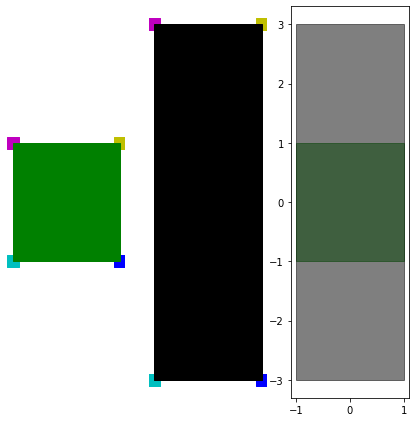

In [ ]:
E = [[1, 0],
     [0, 3]]
show_TL(E)

### $Π
= \begin{bmatrix}
0 & 0\\
0 & 1\\
\end{bmatrix}$

Tengo la siguiente transformación lineal:

$\begin{bmatrix}
1\\
0\\
\end{bmatrix} → \begin{bmatrix}
0\\
0\\
\end{bmatrix}$

$\begin{bmatrix}
0\\
1\\
\end{bmatrix} → \begin{bmatrix}
0\\
1\\
\end{bmatrix}$

¿Qué hace esta trasformación lineal?

$ Π = \begin{bmatrix}
0 & 0\\
0 & 1\\
\end{bmatrix}$

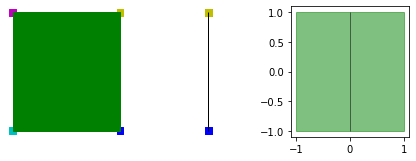

In [ ]:
PI = [[0,0],
      [0,1]]
show_TL(PI)

### $F 
= \begin{bmatrix}
-1 & 0\\
0 & 1\\
\end{bmatrix}$

Tengo la siguiente transformación lineal:

$\begin{bmatrix}
1\\
0\\
\end{bmatrix} → \begin{bmatrix}
-1\\
0\\
\end{bmatrix}$

$\begin{bmatrix}
0\\
1\\
\end{bmatrix} → \begin{bmatrix}
0\\
1\\
\end{bmatrix}$

¿Qué hace esta trasformación lineal?

$ F = \begin{bmatrix}
-1 & 0\\
0 & 1\\
\end{bmatrix}$

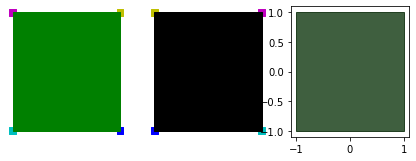

In [ ]:
F = [[-1, 0],
     [0, 1]]
show_TL(F)

### $R
 = \begin{bmatrix}
\frac{3}{5} & -\frac{4}{5}\\
\frac{4}{5} & \frac{3}{5}\\
\end{bmatrix}$

Tengo la siguiente transformación lineal:



$(1, 0) → (\dfrac{3}{5}, \dfrac{4}{5})$

$(0, 1) → (-\dfrac{4}{5}, \dfrac{3}{5})$

¿Qué hace esta trasformación lineal?

$ R = \begin{bmatrix}
\frac{3}{5} & -\frac{4}{5}\\
\frac{4}{5} & \frac{3}{5}\\
\end{bmatrix}$

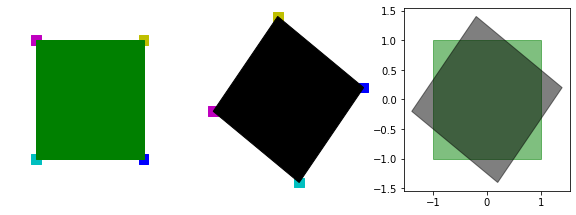

In [ ]:
R = [[3/5, -4/5],[4/5, 3/5]]
show_TL(R)

### $C
= \begin{bmatrix}
1 & 0\\
1 & 1\\
\end{bmatrix}$

Tengo la siguiente transformación lineal:

$\begin{bmatrix}
1\\
0\\
\end{bmatrix} → \begin{bmatrix}
-1\\
1\\
\end{bmatrix}$

$\begin{bmatrix}
0\\
1\\
\end{bmatrix} → \begin{bmatrix}
0\\
1\\
\end{bmatrix}$

¿Qué hace esta trasformación lineal?

$ C = \begin{bmatrix}
1 & 0\\
1 & 1\\
\end{bmatrix}$

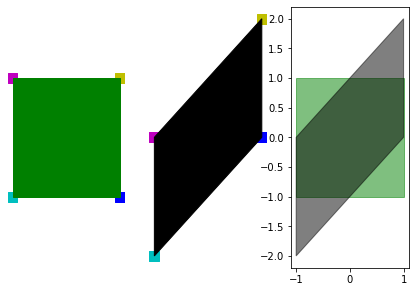

In [ ]:
C = [[1, 0], [1, 1]]
show_TL(C)

### $T
 = \begin{bmatrix}
2 & 3\\
-7 & \frac{1}{2}\\
\end{bmatrix}$

Tengo la siguiente transformación lineal:


$\begin{bmatrix}
1\\
0\\
\end{bmatrix} → \begin{bmatrix}
2\\
-7\\
\end{bmatrix}$

$\begin{bmatrix}
0\\
1\\
\end{bmatrix} → \begin{bmatrix}
3\\
\frac{1}{2}\\
\end{bmatrix}$

¿Qué hace esta trasformación lineal?

$ T = \begin{bmatrix}
2 & 3\\
-7 & \frac{1}{2}\\
\end{bmatrix}$

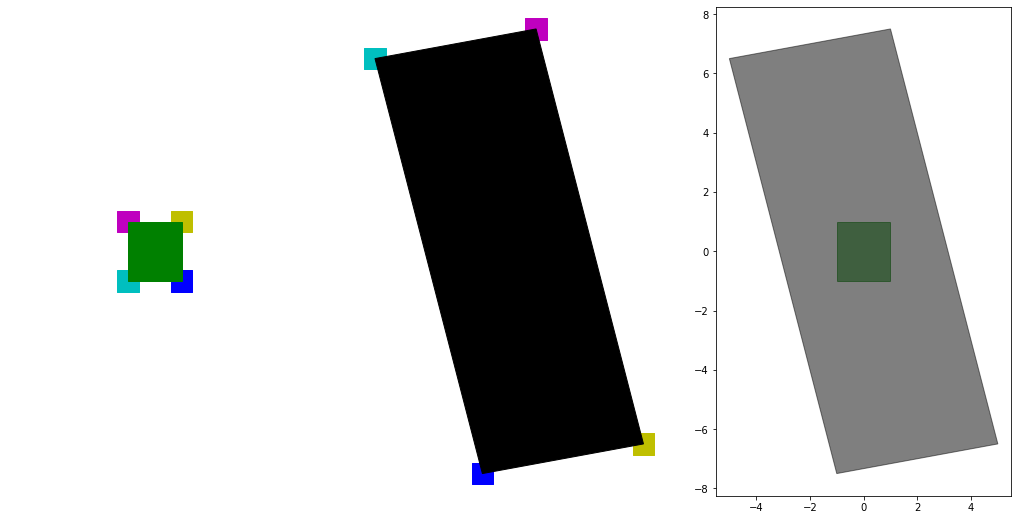

In [ ]:
T = [[2, 3], [-7, 0.5]]
show_TL(T)

### Resumen:

En general pareciera que todas las transformaciones lineales pueden reducirse a 5 tipos de transformaciones o combinaciones de ellas:

* contracciones $C$
* expansiones $E$
* reflexiones $F$
* proyecciones $\Pi$
* rotaciones $R$
* deformaciones de corte $C$


### Preguntas:

1. ¿Podemos representar la multiplicación por un escalar con una matriz?
2. ¿Podemos representar la proyección en un **eje arbitrario** con una matriz?
2. ¿Podemos representar el determinante con una matriz?
2. ¿Podemos representar la reflexión por un **eje arbitrario** coon una matriz?
1. ¿Podemos representar el cálculo de la inversa con una matriz?

P
[[ 0.64 -0.48]
 [-0.48  0.36]]
L
[[ 0.28 -0.96]
 [-0.96 -0.28]]


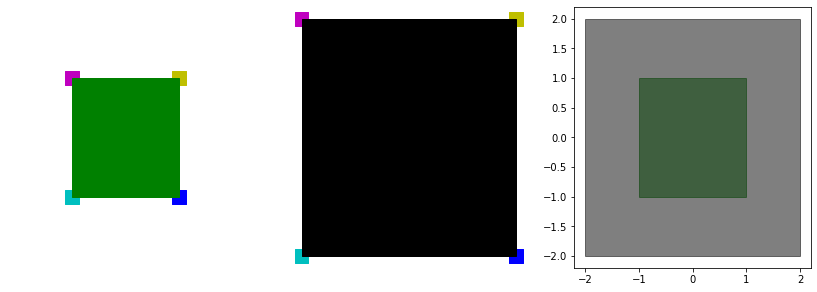

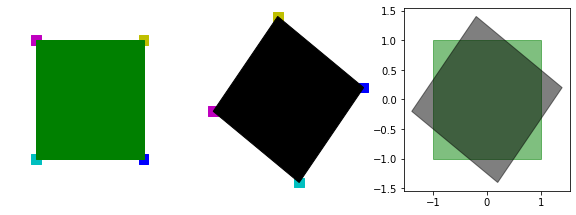

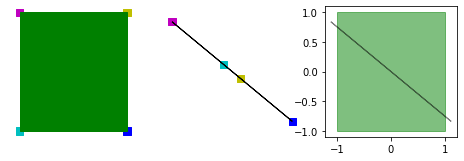

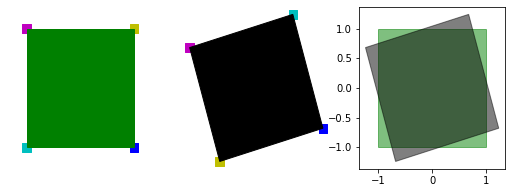

In [ ]:
K = [[2,0],[0,2]]

R = np.matrix(R)

#F = [[-1,0],
#     [0,1]]

L = np.matrix(F)
L = R @ L @ R.T

P = np.matrix(PI)
P = R @ P @ R.T

print("P")
print(P)
print("L")
print(L)

show_TL(K)
show_TL(R)
show_TL(P)
show_TL(L)

## Limitaciones de una transformación lineal.

Hemos visto que hay cosas que una matriz o una transformación lineal no puede hacer. Sería interesante saber cuales son lo límites de una transforamción lineal.

Por definición, las transformaciones lineales deben preservar sumas y multiplicaciones por un escalar.

Si $M$ es una transformación lineal, $x$ e $y$ vectores y α un escalar entonces M debe verificar:

$M(x + y) = Mx + My$

$M(\alpha x) = \alpha(Mx)$

Para todo $x$, $y$, $\alpha$

### Ejemplo de aplicación

A partir de la definición anterior, se puede ver que la inversa y el determinante no pueden ser transformaciones lineales

#### Inversa de una martiz


$\mathrm{Inv}(I) = 
\mathrm{Inv}\left(\begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix}\right)=\begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix}$

$\mathrm{Inv}(0I) = 
\mathrm{Inv}\left(0\begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix}\right)=0\mathrm{Inv}\left(\begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix}\right)=0\begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix}=\begin{bmatrix}
0 & 0\\
0 & 0\\
\end{bmatrix}$

¡Pero la matriz $0I$ No tiene inversa!

#### Determinante de una martiz

$\det(I)=\det\left(\begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix}\right) = 1$

$\det(2I) = \det(I + I) = \det(I) + \det(I) = 1 + 1$

Pero:

$\det(2I)=\det\left(\begin{bmatrix}
2 & 0\\
0 & 2\\
\end{bmatrix}\right) = 4$


## Composición de funciones

Para calcular $P$ y $L$ hemos aplicado una rotación $R^T$, luego multiplicamos por una matriz diagonal y luego por otra rotación $R$

$\Pi =
\begin{bmatrix}
0&0\\
0&1
\end{bmatrix}$

$ R = \begin{bmatrix}
\frac{3}{5} & -\frac{4}{5}\\
\frac{4}{5} & \frac{3}{5}\\
\end{bmatrix}$

$ F = \begin{bmatrix}
-1 & 0\\
0 & 1\\
\end{bmatrix}$

$P = R\Pi R^T$

$L = RFR^T$

La idea de esto es componer transformaciones lineales. Es decir, aplicar una a continuación de la otra. La justificación explicar por que esto funcióna es sencilla. 

Empecemos por la reflexión:

Primero necesitamos rotar nuestro sistemas de coordenadas para llevar los puntos del eje $x$ a la recta $4x - 3y = 0$. Eso es lo que hace $R^T$

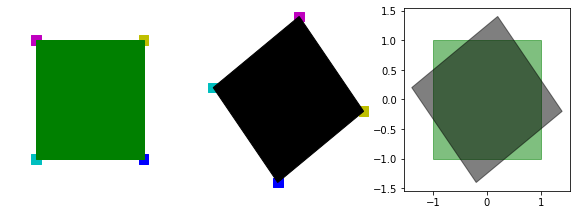

In [ ]:
show_TL(R.T)

Luego realizamos una reflexión,con la matriz $F$. De hecho ya sabíamos como hacer eso cuando estudiamos $F$

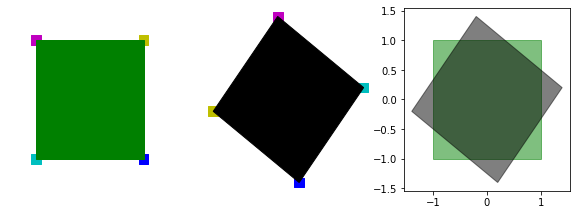

In [ ]:
show_TL(F@R.T)

Por ultimo regresamos a las coordenas originales. por medio de $R$

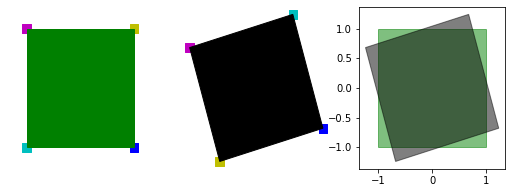

In [ ]:
show_TL(R@F@R.T)

## ¿Existe una forma de representar las transformaciones lineales a paritr de transformaciones básicas?


Hemos visto que en algunos casos, algunas transformaciones lineales pueden representarse u obtenerse a traves de transformaciones más sencillas. Por ejemplo las proyecciones y las reflexiones. Pero esto dos deja la pregunta de si este resultado es general para toda transformación lineal. 

Analicemos una matriz $M$ y tratemos de describirla *cualitativamente* como hemos hecho hasta ahora

$ M = \begin{bmatrix}
-\frac{3}{2} & 2\\
0 & \frac{1}{2}\\
\end{bmatrix}$

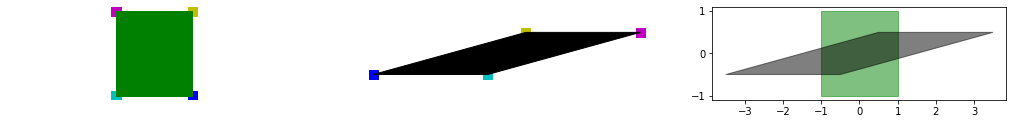

In [ ]:
M = [[-1.5, 2], [0, 0.5]]
show_TL(M)

Vemos que esta matriz hace deformaciones de cortes y luego comprime y expande en otras direcciones.

Sin embargo, no todos vectores son iguales para nuestra matriz.

$ M = \begin{bmatrix}
-\frac{3}{2} & 2\\
0 & \frac{1}{2}\\
\end{bmatrix},~
x_1 = \begin{bmatrix}
1\\
0 \\
\end{bmatrix},~
x_2 = \begin{bmatrix}
1\\
1\\
\end{bmatrix},~
x_3 = \begin{bmatrix}
0\\
1\\
\end{bmatrix}$

In [ ]:
M = np.matrix([[-1.5, 2], [0, 0.5]])
x_1 = np.matrix([1,0]).T # me aseguro que sean columnas
x_2 = np.matrix([1,1]).T
x_3 = np.matrix([0,1]).T
y_1 = M @ x_1
y_2 = M @ x_2
y_3 = M @ x_3
data = np.concatenate((x_1 , y_1, x_2 , y_2, x_3 , y_3),1) 
label = np.matrix([["x1","y1","x2","y2","x3","y3"]])

print("y1 = M(x1)")
print("y2 = M(x2)")
print("y3 = M(x3)")
print()
print(label)
print("---------------------------------")
print(data)


y1 = M(x1)
y2 = M(x2)
y3 = M(x3)

[['x1' 'y1' 'x2' 'y2' 'x3' 'y3']]
---------------------------------
[[ 1.  -1.5  1.   0.5  0.   2. ]
 [ 0.   0.   1.   0.5  1.   0.5]]


¡Hay direcciones donde el efecto de la matriz es solo multiplicarar por un número!

$ M = \begin{bmatrix}
-\frac{3}{2} & 2\\
0 & \frac{1}{2}\\
\end{bmatrix},~
x_1 = \begin{bmatrix}
1\\
0 \\
\end{bmatrix},~
x_2 = \begin{bmatrix}
1\\
1\\
\end{bmatrix},~
x_3 = \begin{bmatrix}
0\\
1\\
\end{bmatrix}$

$M(x_1) = \begin{bmatrix}
-\frac{3}{2} & 2\\
0 & \frac{1}{2}\\
\end{bmatrix} 
\begin{bmatrix}
1\\
0 \\
\end{bmatrix} = 
\begin{bmatrix}
-\frac{3}{2}\\
0\\
\end{bmatrix} =
-\frac{3}{2} \begin{bmatrix}
1\\
0 \\
\end{bmatrix} =
 -\dfrac{3}{2}x_1$

$M(x_2) = 
\begin{bmatrix}
-\frac{3}{2} & 2\\
0 & \frac{1}{2}\\
\end{bmatrix} 
\begin{bmatrix}
1\\
1 \\
\end{bmatrix} =
\begin{bmatrix}
\frac{1}{2}\\
\frac{1}{2}\\ 
\end{bmatrix} =
\frac{1}{2} \begin{bmatrix}
1\\
1 \\
\end{bmatrix} =
\dfrac{1}{2}x_2$

$M(x_3) = 
\begin{bmatrix}
-\frac{3}{2} & 2\\
0 & \frac{1}{2}\\
\end{bmatrix} 
\begin{bmatrix}
0\\
1 \\
\end{bmatrix} =
\begin{bmatrix}
2\\
\frac{1}{2}\\ 
\end{bmatrix}$

Tal vez encontrar estas direcciones preferenciales nos den una pista para encontrar una más sencilla de forma sencilla de nuestras matrices.

## Autovalores y autovectores

Al parecer nuestra matriz $M$, tiene direcciones preferenciales. Cuando $M$ actua sobre un vector $x_i$ en estas direcciones, $M$ solo multiplica por una constante, componente a componente.

En una matriz arbitraria, estos vectores $x_i$ son conocidos como ***autovectores*** o ***eigenvectores*** y las constante $λ_i$ que multiplican los vectores se llaman ***autovalores*** o ***eigenvalores***

$ M = \begin{bmatrix}
-\frac{3}{2} & 2\\
0 & \frac{1}{2}\\
\end{bmatrix}$

Los autovalores y autovectores de $M$ son:

$x_1 = \begin{bmatrix}
1\\
0 \\
\end{bmatrix},~ \lambda_1 = -\dfrac{3}{2}\\
x_2 = \begin{bmatrix}
1\\
1\\
\end{bmatrix},~ \lambda_2 = \dfrac{1}{2}$


## Diagonalización de una matriz:

### Ejemplo de cálculo de autovectores y autovalores


Consideremos nuestra matriz $M$. Hasta ahora, alguien nos entrego sus autovalores y autovectores. Pero sería bueno saber como encontrarlos. 

#### Métodos iterativos para autovalores y autovectores

Por ahora lo único que sabemos es que queremos encontrar un autovector $x_i$ y un autovalor $λ_i$ que verifican.

$Mx_i = \lambda_ix_i$

Supongamos que tenemos solo un vector inicial $v$ y apliquemos sucesivas veces $M$

In [ ]:
v = np.matrix([-2, 1]).T
print("itereación: 0", v[0],v[1])
for i in range(10):
  v = M @ v
  print("itereación:",i+1,v[0],v[1])

itereación: 0 [[-2]] [[1]]
itereación: 1 [[5.]] [[0.5]]
itereación: 2 [[-6.5]] [[0.25]]
itereación: 3 [[10.25]] [[0.125]]
itereación: 4 [[-15.125]] [[0.0625]]
itereación: 5 [[22.8125]] [[0.03125]]
itereación: 6 [[-34.15625]] [[0.015625]]
itereación: 7 [[51.265625]] [[0.0078125]]
itereación: 8 [[-76.8828125]] [[0.00390625]]
itereación: 9 [[115.33203125]] [[0.00195312]]
itereación: 10 [[-172.99414062]] [[0.00097656]]




Despues de iteraciones con un vector arbitrario obtenemos algo parecido a un autovector. Decimos que es algo parecido a un auto vector por lo siguiente: 

Sabíamos que $(x_1)^T = \begin{bmatrix} 1&0\end{bmatrix}$ era un autovector, pero tambien lo será $(y)^T = \begin{bmatrix} -2&0\end{bmatrix}$, $(u)^T = \begin{bmatrix} 100&0\end{bmatrix}$ o $(w)^T = \begin{bmatrix} -173&0\end{bmatrix}$. En neustra iteración final, estamos cerca de un valor similar a $w$, un autovector propiamente dicho.

Vemos que las aplicaciones sucesivas nos un vector que se acerca a un autovector. Con lo cual podemos proponer este truco para encontrar un autovector. De hecho podemos proponer una mejora. Dado que algunas componentes pueden aumentar, es recomendable ir achicando nuestros vectores para evitar que estos crezcan indefinidamente. Lo mismo si nuestro vectores se achicaran. Para solucionar esto, eligiremos dividir la mayor componente en valor absoluto. Por ejemplo en nuestro vector $(v)^T = \begin{bmatrix}-2&1\end{bmatrix}$ deberiamos dividir todo por $-2$

In [ ]:
v = np.matrix([-2, 1]).T
print("itereación: 0", v[0],v[1])
for i in range(10):
  v = M @ v
  v_abs = abs(v) # aplicamos valor absoluto componente a componente
  n = v_abs.argmax() # elegimos la componente con mayor valor absoluto
  lamb = v[n].copy() # guardamos la componente con mayor valor absoluto  
  v /= lamb #dividimos por la componente con mayor valor absoluto  
  print("itereación:",i+1,v[0],v[1],lamb,n)

itereación: 0 [[-2]] [[1]]
itereación: 1 [[1.]] [[0.1]] [[5.]] 0
itereación: 2 [[1.]] [[-0.03846154]] [[-1.3]] 0
itereación: 3 [[1.]] [[0.01219512]] [[-1.57692308]] 0
itereación: 4 [[1.]] [[-0.00413223]] [[-1.47560976]] 0
itereación: 5 [[1.]] [[0.00136986]] [[-1.50826446]] 0
itereación: 6 [[1.]] [[-0.00045746]] [[-1.49726027]] 0
itereación: 7 [[1.]] [[0.00015239]] [[-1.50091491]] 0
itereación: 8 [[1.]] [[-5.08078447e-05]] [[-1.49969521]] 0
itereación: 9 [[1.]] [[1.6934801e-05]] [[-1.50010162]] 0
itereación: 10 [[1.]] [[-5.64506114e-06]] [[-1.49996613]] 0


Al guardar la componente con mayor valor absoluto y dividir por ella, en esencia hemos encontrado también un autovalor.

La elección de dividir por la componente en mayor valor absoluto no es arbitraria. Puede demostrarse que nuestro algoritmo converge a un autovector si dividimos nuestros resultados por cualquier norma de $v$. En ese sentido, podríamos haber dividido por cualquier norma. Podríamos haber dividido por la norma euclidiana para encontrar los autovectores. Sin embargo, si elegimos la llamada **norma infinito**, esta norma nos devuelve el valor absoluto de el autovalor correpondiente. De hecho al quedarnos con la componente original, recuperamos el signo.

NormaInfinito($v$):
  1. calculo el valor absoluto de cada componente de $v$
  2. busco $k$, el máximo de los valores absolutos 
  3. devuelvo el valor $k$ encontrado.

```
def NormaInfinito(v):
  u = v.abs()
  k = u.max()
  return k
```

Podemos ver que algoritmo nos ha permitdo calcular un solo autovector y un solo autovalor. De hecho, puede demostrarse que siempre encuentra el autovalor con mayor valor absoluto y autovector asociado.

Sin embargo, aun nos faltan encontrar otros autovalores y autovectores. Vemos que este problema puede ser muy intensivo en cálculo, si seguimos por este camino.

Afortunadamente, existen técnicas númericas más avanzadas inspiradas en este algoritmo. Estás técnicas pemiten encontrar todos los autovalores y autovectores. Además, estás ya se encuentran incluidas en `numpy`

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(M) #cálculo de autosistema
print(eigenvalues[0], eigenvectors.T[0])
print(eigenvalues[1], eigenvectors.T[1])


-1.5 [[1. 0.]]
0.5 [[0.70710678 0.70710678]]


En efecto, a la salida tenemos cada autovalor y su autovector correspondiente. Debido a como se trabaja el algoritmo, los autovectores siempre terminan normalizados con norma euclidiana.

### Diagonalización

Definamos las siguientes matrices a partir de los autovectores y autovalores de $M$ arbitraria:

$\Lambda = \begin{bmatrix}
λ_1&0&\dots & 0\\
0&λ_2&\dots & 0\\
\vdots&\vdots&\ddots & \vdots\\
0&0&\dots & λ_n\\
\end{bmatrix}$

$X = 
\begin{bmatrix}
x_1|x_2|\dots |x_n
\end{bmatrix}$

Es decir, en $\Lambda$ ponemos todos los autovalores $\lambda_i$ de $M$ en la diagonal. El resto de los elementos los llenamos de 0. Por otro lado en $X$ podemos a los autovectores $x_i$ de $M$ como columnas, **respetando que el orden de los auto vectores coindida con los autovalores**. 

Se puede demostrar que si $X$ es invertible, entonces:

$M = XΛX^{-1}$

$XΛX^{-1}$ es la composición de aplicar  $X^{-1}$, luego $Λ$ y finalmente $X$. Para nuestra $M$ tenemos:

$M = X\Lambda X^{-1}$

$M = \begin{bmatrix}
-\frac{3}{2} & 2\\
0 & \frac{1}{2}\\
\end{bmatrix},~
\Lambda = \begin{bmatrix}
-\frac{3}{2} & 0\\
0 & \frac{1}{2}\\
\end{bmatrix}$

$ X^{-1} =
\begin{bmatrix}
1 & -1\\
0 & \sqrt{2}\\
\end{bmatrix},~ 
X = \begin{bmatrix}
1 & \dfrac{\sqrt{2}}{2}\\
0 & \dfrac{\sqrt{2}}{2}\\
\end{bmatrix}$

In [ ]:
X = eigenvectors
X_inv = np.linalg.inv(X)

Lambda_M = np.zeros(M.shape)
for i in range(eigenvalues.size):
  Lambda_M[i][i] = eigenvalues[i]

print(X @ Lambda_M @ X_inv)
print(M)

[[-1.5  2. ]
 [ 0.   0.5]]
[[-1.5  2. ]
 [ 0.   0.5]]


En función a lo anterior podemos ver que hay matrices, como $M$, que pueden ser representadas como diagonales. Para que puedan ser representadas como diagonales, necesitamos que esta matriz X$ de autovectores sea invertible.

#### Observación:

Para diagonalizar una matriz necesitamos a $X$ y su inversa.

Podrían existir tres matrices $U$, $Y$, $\Sigma$ con $\Sigma$ diagonal tal que 

$M = U\Sigma Y$

pero 

$UY \neq I$

$YU \neq I$

### La diagonalización no es única

$M = X^{-1}\Lambda X = Y^{-1}\Lambda Y$

$M = \begin{bmatrix}
-\frac{3}{2} & 2\\
0 & \frac{1}{2}\\
\end{bmatrix},~
\Lambda = \begin{bmatrix}
-\frac{3}{2} & 0\\
0 & \frac{1}{2}\\
\end{bmatrix}$

$ Y^{-1} =
\begin{bmatrix}
1 & 1\\
0 & 1\\
\end{bmatrix},~ 
Y = \begin{bmatrix}
1 & -1\\
0 & 1\\
\end{bmatrix}$

$ X^{-1} =
\begin{bmatrix}
1 & -1\\
0 & \sqrt{2}\\
\end{bmatrix},~ 
X = \begin{bmatrix}
1 & \dfrac{\sqrt{2}}{2}\\
0 & \dfrac{\sqrt{2}}{2}\\
\end{bmatrix}$

In [ ]:
X = eigenvectors
X_inv = np.linalg.inv(X)

Y = np.matrix([[1,1],
               [0,1]])
Y_inv = np.linalg.inv(Y)

Lambda_M = np.zeros(M.shape)
for i in range(eigenvalues.size):
  Lambda_M[i][i] = eigenvalues[i]

print(X @ Lambda_M @ X_inv)
print(Y @ Lambda_M @ Y_inv)
print(M)

[[-1.5  2. ]
 [ 0.   0.5]]
[[-1.5  2. ]
 [ 0.   0.5]]
[[-1.5  2. ]
 [ 0.   0.5]]


### No toda matriz es diagonalizable

* Las matrices que representan rotaciones son diagonalizables... *si usamos números complejos como autovalores*

* Una deformación de corte no puede diagonalizarse. Para esos casos se usan otras herramientas que generalizan noción de *diagonalización* (Formas de Jordan)

### Diagonalización de matrices simétricas

Toda matriz simétrica $B$ es diagonalizable
* Todos los autovalores $\lambda_i$ son *reales*
* Los autovectores $x_i$ forman una base ortogonal.
 
  Es decir, si usamos autovectores con norma unitaria para construir $X$ se verifica:

  $X^T=X^{-1}$

* Equivalentemente $X$ repesenta una rotación

In [ ]:
B = np.matrix([[1,2],
               [2,3]])
# eigh es una función optimizada para matrices simétricas
B_values, B_vectors = np.linalg.eigh(B)

B_diag = np.zeros(B.shape)
for i in range(B_values.size):
  B_diag[i][i] = B_values[i]

print(B)
print()
print(B_diag)
print(B_vectors)
print()
print(B_vectors @ B_vectors.T)
print(B_vectors @ B_diag @ B_vectors.T)

[[1 2]
 [2 3]]

[[-0.23606798  0.        ]
 [ 0.          4.23606798]]
[[-0.85065081  0.52573111]
 [ 0.52573111  0.85065081]]

[[ 1.0000000e+00 -1.2127222e-17]
 [-1.2127222e-17  1.0000000e+00]]
[[1. 2.]
 [2. 3.]]


## Descomposición en Valores Singulares

Hasta ahora hemos hablado de matrices cuadradas. Nuestra idea era buscar representar matrices de manera tal que pudieramos explicar el efecto de una matriz, de forma sencilla. 

En general las matrices no son cuadradas. Además las matrices cuadradas no siempre son diagonalizables. En resumen, nuestros trucos con autovectores y autovalores pueden fallar.

Por esta razón necesitamos algo más robusto para nuestro problema.

Al final de la sección anterior dijimos que toda matriz simétrica es diagonalizable. En función de esto podemos proponer trabajar con una matriz simétrica $S$, a partir de una matriz $A$ arbitraria, incluso tal vez rectangular. 

Antes de hablar de $S$ analicemos como hacemos composición de transformacioens lineales con matriz rectangular 

$A = \begin{bmatrix}1&2&3\\
5&4&3\end{bmatrix} $

$A$ recibe vectores de dimensión 3 y devuelve vectores de dimensión 2


In [ ]:
A = np.matrix([[1,2,3],
               [5,4,3]])

b = np.matrix([1,0,0]).T

c = A @ b
c.T , b.T

(matrix([[1, 5]]), matrix([[1, 0, 0]]))

Esto nos indica que para que poder componer una matriz rectangular $A$ por otra matriz $B$ debemos hacer que el número de filas de $A$ conicida con el número de columnas de $B$

In [ ]:
print(M @ A)
print(M)
print(A)

[[8.5 5.  1.5]
 [2.5 2.  1.5]]
[[-1.5  2. ]
 [ 0.   0.5]]
[[1 2 3]
 [5 4 3]]


Es fácil ver que si el número de filas y columnas no coindice la  composición entre transformaciones lineales es imposible. Solo con esto vemos que en general la composición de transformaciones lineales no es conmutativa. 

Debido a que esta composición aparece en un montón de otras aplicaciónes, es normal llamar a esta composición ***multiplicación entre matrices***. Por ejemplo, esta multiplicación entre matrices, también nos permite definir el producto escalar de una manera consistente e incluso generalizarlo a otros casos.

En función a lo anterior, vemos que hay precuaciones a considerar para obtener una matriz simétrica $S$ a partir de $A$ multiplicando por otra matriz.

Por suerte, podemos elegir una matriz que siempre tiene como cantidad de filas la cantidad de columnas de $A$  y como cantidad de columnas la cantidad de filas de $A$: $A^T$, la transpuesta de $A$

$A^T = \begin{bmatrix}1&5\\
2&4\\
3&3\end{bmatrix} $

De hecho, $AA^T$ siempre es simátrica para cualquier matriz $A$, incluso para matrices rectangulares

In [ ]:
S = A @ A.T
S

matrix([[14, 22],
        [22, 50]])

Por como construimos $S$, además de simétrica, $S$ es definida positiva. Es decir, todos sus auto valores son positivos

In [ ]:
values, vectors =  np.linalg.eigh(S)
# eigh es una función optimizada para matrices simétricas

print(values)
print(vectors)

[ 3.57465919 60.42534081]
[[-0.90366968  0.4282302 ]
 [ 0.4282302   0.90366968]]


También podríamos construir $H = A^TA$. En ese caso notariamos algo interesante:

In [ ]:
H = A.T @ A
print(H)
print()

newValues, newVectors = np.linalg.eigh(H)
print(newValues)
print(newVectors)

[[26 22 18]
 [22 20 18]
 [18 18 18]]

[-7.11216106e-15  3.57465919e+00  6.04253408e+01]
[[-0.40824829  0.6545176  -0.63634899]
 [ 0.81649658 -0.04993903 -0.57518643]
 [-0.40824829 -0.75439565 -0.51402386]]


Dos de los autovalores de $S$ coinciden con los autovalores de $H$. El restante es muy cercano a 0. De hecho, eso se debe a un problema del cálculo en una PC. Si pudieramos tener precisión arbitraria el autovalor restante debe ser 0.

Además, existe otra propiedad, Si $A$ hubiera sido una matriz diagonalizable, los autovalores de $A$ son la raiz cuadrada de los autovalores de $S$, a menos de signo.

A partir de este experimento con S y H podemos ver algo interesante:

$A^TA = VDV^T$

$AA^T = U\Lambda U^T$

Concentremos nos en la parte con $A$

$A^T\underline{A} = VD\underline{V^T}$

$\underline{A}A^T = \underline{U}\Lambda U^T$

La notación nos sugiere que podemos escribir $A$ como:

$A = U\Sigma V^T$

Donde $\Sigma$ tiene información de $D$ y $Λ$. $U$ y $V^T$ son cuadradas. De aquí vemos que $\Sigma$ tiene la misma forma que $A$. Ademas:

$Σ^TΣ = D$

$ΣΣ^T = Λ$

Es decir, $Σ$ es una especie de raiz cuadrada de $D$ y $Λ$, a menos de un signo.

Esta forma de rescribir $A$, se conoce como **descomposición en valores singulares**

In [ ]:
U, Sigma, V_T = np.linalg.svd(A)

print(A)
print()
print(U)
Sigma_M = np.zeros(A.shape)
for i in range(Sigma.size):
  Sigma_M[i][i] = Sigma[i]
print(Sigma_M)
print(V_T)
print()
print(U @ Sigma_M @ V_T)

[[1 2 3]
 [5 4 3]]

[[-0.4282302  -0.90366968]
 [-0.90366968  0.4282302 ]]
[[7.77337384 0.         0.        ]
 [0.         1.89067691 0.        ]]
[[-0.63634899 -0.57518643 -0.51402386]
 [ 0.6545176  -0.04993903 -0.75439565]
 [ 0.40824829 -0.81649658  0.40824829]]

[[1. 2. 3.]
 [5. 4. 3.]]


# Mandar al final

### Algoritmo 1

* Representamos un vector $v$ como combinación lineal de los vectores $x_i$, es decir, los autovectores de $A$
  * $v = \alpha_1x_1 + \alpha_1x_1 + … + \alpha_nx_n$
* Aplicamos los autovalores de $A$ segun corresponda
  * $x_1 \to \lambda_1x_1$
  * $x_2 \to \lambda_2x_2$
  * $\vdots$
  * $x_n \to \lambda_nx_n$
* Sumamos los resultados parciales.
  * $Mv = \lambda_1\alpha_1x_1 + \lambda_2\alpha_2x_2 + … + \lambda_n\alpha_1x_n$

### $M$ y el Algoritmo 1


En el apartado anterior encontramos los autovectores y autovalores de $M$. Esto significa que ahora podemos calcular $M$ como propusimos en el Algoritmo 1

$ M = \begin{bmatrix}
-\frac{3}{2} & 2\\
0 & \frac{1}{2}\\
\end{bmatrix}$

$M(x_1) = \lambda_1 x_1,~x_1 = \begin{bmatrix}
1\\
0 \\
\end{bmatrix},~ \lambda_1 = -\dfrac{3}{2}\\
M(x_2) = \lambda_2 x_2,~x_2 = \begin{bmatrix}
1\\
1\\
\end{bmatrix},~ \lambda_2 = \dfrac{1}{2}$

El primer paso del Algoritmo 1 nos pide saber como escribir un vector arbitrario $v$ en términos de $x_i$, los autovectores de $A$. Es decir queremos conocer los $\alpha_i$ que verifican:

$v = \alpha_1x_1 + \alpha_1x_1 + … + \alpha_nx_n$

Esto lo podemos reescribir esto de la siguiente manera:

$v = Xa$

$X = 
\begin{bmatrix}
x_1|x_2|\dots |x_n
\end{bmatrix}$

$a = 
\begin{bmatrix}
\alpha_1\\ \hline
\alpha_2\\\hline
\vdots\\ \hline
\alpha_n
\end{bmatrix}$

Hemos apilado los $\alpha_i$ en un vector columna y unido los vectores columnas de $x_i$ para crear la matriz $X$. Puede parecer que lo que hicimos es meramente un cambio de notación. Sin embargo, la notación nos dice como calcular los $\alpha_i$. Si los $x_i$ forman una base, eso significa que $X$ debe tener inversa. Por lo tanto:

$X^{-1}v = a$

Al final del primer paso tenemos

$v \to a$

$a = X^{-1} v$

Ahora tenemos un vector columna $a$ sobre el que ya aplicaremos $M$. Como $a$ está en términos de los autovectores $x_i$, solo tenemos que multiplicar componente a componente usando los autovalores $λ_i$. Aprovechando la notación anterior definiremos la matriz $\Lambda$:

$\Lambda = \begin{bmatrix}
λ_1&0&\dots & 0\\
0&λ_2&\dots & 0\\
\vdots&\vdots&\ddots & \vdots\\
0&0&\dots & λ_n\\
\end{bmatrix}$

De esta manera, para proceder con nuestro segundo paso ahora debemos calcular:

$a \to \Lambda a$

$\Lambda a = \Lambda X^{-1} v$

Para terminar, debemos hacer que $\Lambda a$ deje de estar en términos de $x_i$. Sin embargo, ya sabemos como eliminar eso. De hecho lo vimos al principio de esta sección:

$v = Xa$

En efecto $a$ ha dejado de estar en términos de $x_i$ y ahora a vuelto a su forma anterior, $v$. Por lo tanto, el paso final es:

$\Lambda a \to X\Lambda a$

Finalmente tenemos

$Mv = X \Lambda X^{-1} v$

Como $v$ es un vector arbitrario, podemos asegurar:

$M = X \Lambda X^{-1}$

$M = \begin{bmatrix}
-\frac{3}{2} & 2\\
0 & \frac{1}{2}\\
\end{bmatrix},~
\Lambda = \begin{bmatrix}
-\frac{3}{2} & 0\\
0 & \frac{1}{2}\\
\end{bmatrix}$

$ X^{-1} =
\begin{bmatrix}
1 & 1\\
0 & 1\\
\end{bmatrix},~ 
X = \begin{bmatrix}
1 & -1\\
0 & 1\\
\end{bmatrix}$

Como $X$ y $X^{-1}$ deben ser inversas, estas matrices deben verificar:

$X^{-1}X = 
\begin{bmatrix}
1 & 1\\
0 & 1\\
\end{bmatrix}
\begin{bmatrix}
1 & -1\\
0 & 1\\
\end{bmatrix} = 
\begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix} = I$

$XX^{-1} = 
\begin{bmatrix}
1 & -1\\
0 & 1\\
\end{bmatrix}
\begin{bmatrix}
1 & 1\\
0 & 1\\
\end{bmatrix} = 
\begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix} = I$

Vemos que en realidad el Algoritmo 1 no es útil. No solo debemos aplicar 3 matrices, sino que una de ellas es una inversa. 

#### Calculo analítico de autovectores y autovalores

Para encontrar los autovectores de $M$ debemos resolver el sistema 

$(M - \lambda_iI)x_i = 0$


Primero calcularemos $M - \lambda_1I$

$ M - \lambda_1 I = \begin{bmatrix}
-\frac{3}{2} - \lambda_1& 2\\
0 & \frac{1}{2} - \lambda_1\\
\end{bmatrix}$

$ M - \lambda_1 I = \begin{bmatrix}
-\frac{3}{2} - (-\frac{3}{2})& 2\\
0 & \frac{1}{2} - (-\frac{3}{2})\\
\end{bmatrix}$

$ M - \lambda_1 I = \begin{bmatrix}
0& 2\\
0 & 2\\
\end{bmatrix}$

Aplicamos ahora a $M - \lambda_1 I$ sobre un vector arbitrario

$ (M - \lambda_1 I)x_1 = \begin{bmatrix}
0& 2\\
0 & 2\\
\end{bmatrix}
\begin{bmatrix}
\alpha\\
\beta \\
\end{bmatrix}$

Esto genera dos ecuaciones iguales:

$2\beta = 0$

$\beta = 0$

Por lo tanto nuestras solucioens son de la forma:

$ \begin{bmatrix}
\alpha\\
0 \\
\end{bmatrix}= \alpha \begin{bmatrix}
1\\
0 \\
\end{bmatrix}$

Elegimos nuestro autovector $x_1$

$x_1 = \begin{bmatrix}
1\\
0 \\
\end{bmatrix}$


De manera analoga para $\lambda_2$ tenemos:

$ M - \lambda_2 I = \begin{bmatrix}
-2& 2\\
0 & 0\\
\end{bmatrix}$

Aplicamos ahora a $M - \lambda_2 I$ sobre un vector arbitrario

$ (M - \lambda_2 I)x_2 = \begin{bmatrix}
-2& 2\\
0 & 0\\
\end{bmatrix}
\begin{bmatrix}
\alpha\\
\beta \\
\end{bmatrix}$

Obtenemos la ecuaciones:

$-2\alpha + 2\beta = 0$

$2\alpha = 2\beta$

$\alpha = \beta$

Por lo tanto nuestras solucioens son de la forma:

$ \begin{bmatrix}
\alpha\\
\alpha \\
\end{bmatrix}= \alpha \begin{bmatrix}
1\\
1 \\
\end{bmatrix}$

Elegimos nuestro autovector $x_2$

$x_2 = \begin{bmatrix}
1\\
1 \\
\end{bmatrix}$

Con esto termina el cálculo de nuestros autovectores y autovalores